In [22]:
import math
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd

In [33]:
Fs = 44100
t = np.arange(5*Fs)/Fs
x = np.cos( 2*math.pi*440*t) + 0.5*np.cos( 2*math.pi*435*t) + 0.5*np.cos( 2*math.pi*445*t)

(0.0, 0.1)

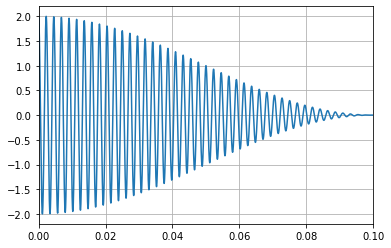

In [34]:
plt.plot(t,x)
plt.grid()
plt.xlim(0,0.1)

In [35]:
ipd.Audio(x,rate=Fs)

In [69]:
w = np.sin( 2*math.pi*0.1*t )**2

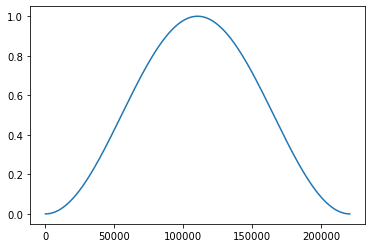

In [68]:
plt.plot(w)

In [98]:
M = 4096
y = w*x + w*np.roll(x,-M) + w*np.roll(x,M//2)

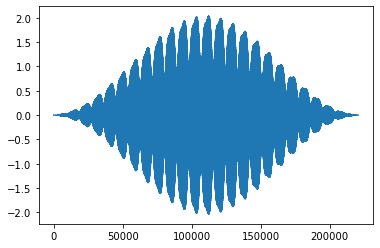

In [99]:
plt.plot(y)

In [100]:
ipd.Audio(y,rate=Fs)